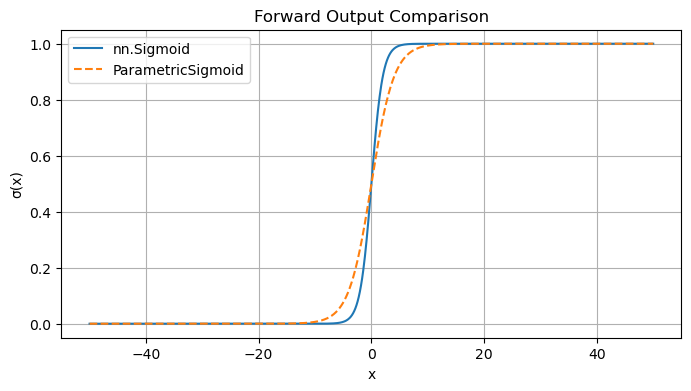

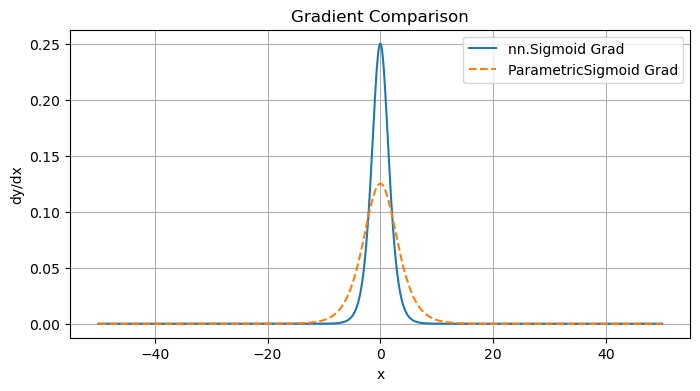

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class ParametricSigmoid(nn.Module):
    def __init__(self, beta=1.0, trainable=False, beta_min=-10.0, beta_max=10.0):
        super().__init__()
        self.beta_min = beta_min
        self.beta_max = beta_max
        if trainable:
            self.beta = nn.Parameter(torch.tensor(beta, dtype=torch.float32))
        else:
            self.register_buffer('beta', torch.tensor(beta, dtype=torch.float32))

    def forward(self, x):
        z = self.beta * x
        
        out = 1 / (1 + torch.exp(-z))
        return out

# --- 输入区间 ---
x = torch.linspace(-50, 50, 1000, requires_grad=True)

# --- nn.Sigmoid ---
x_builtin = x.clone().detach().requires_grad_(True)
sigmoid_builtin = nn.Sigmoid()
y_builtin = sigmoid_builtin(x_builtin)
y_builtin.sum().backward()
grad_builtin = x_builtin.grad.detach()

# --- ParametricSigmoid ---
x_param = x.clone().detach().requires_grad_(True)
sigmoid_param = ParametricSigmoid(beta=0.5, trainable=False)
y_param = sigmoid_param(x_param)
y_param.sum().backward()
grad_param = x_param.grad.detach()

# --- 图1: forward 输出 ---
plt.figure(figsize=(8,4))
plt.plot(x.detach().numpy(), y_builtin.detach().numpy(), label="nn.Sigmoid")
plt.plot(x.detach().numpy(), y_param.detach().numpy(), '--', label="ParametricSigmoid")
plt.title("Forward Output Comparison")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.grid(True)
plt.legend()
plt.show()

# --- 图2: 梯度 ---
plt.figure(figsize=(8,4))
plt.plot(x.detach().numpy(), grad_builtin.numpy(), label="nn.Sigmoid Grad")
plt.plot(x.detach().numpy(), grad_param.numpy(), '--', label="ParametricSigmoid Grad")
plt.title("Gradient Comparison")
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.grid(True)
plt.legend()
plt.show()
